<a href="https://colab.research.google.com/github/mobadata/detection-nouveautes-avis/blob/main/Detection_nouveautes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Importons les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("stopwords")
nltk.download("punkt")
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# Montons note Google drive dans le notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Importation des données

# Chemin du fichier JSON dans le drive
chemin_fichier = "/content/drive/MyDrive/mon_projet_nouveautes/Electronics_5.json"

# Chargement du fichier (format JSON lignes si Amazon)
df = pd.read_json(chemin_fichier, lines=True)

# Affichage des premières lignes
df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [5]:

# infos sur les variables
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   reviewerID      1689188 non-null  object
 1   asin            1689188 non-null  object
 2   reviewerName    1664458 non-null  object
 3   helpful         1689188 non-null  object
 4   reviewText      1689188 non-null  object
 5   overall         1689188 non-null  int64 
 6   summary         1689188 non-null  object
 7   unixReviewTime  1689188 non-null  int64 
 8   reviewTime      1689188 non-null  object
dtypes: int64(2), object(7)
memory usage: 116.0+ MB


In [7]:
# Apercu statistique des données
df.describe(include='all')


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
count,1689188,1689188,1664458,1689188,1689188,1.689188e+06,1689188,1.689188e+06,1689188
unique,192403,63001,162859,8331,1687169,NaN,1139738,NaN,5277
top,ADLVFFE4VBT8,B007WTAJTO,Amazon Customer,"[0, 0]",,NaN,Works great,NaN,"01 7, 2014"
freq,431,4915,26961,963227,1071,NaN,6784,NaN,3051
mean,NaN,NaN,NaN,NaN,NaN,4.222779e+00,NaN,1.340571e+09,NaN
std,NaN,NaN,NaN,NaN,NaN,1.185632e+00,NaN,6.342451e+07,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,9.292320e+08,NaN
25%,NaN,NaN,NaN,NaN,NaN,4.000000e+00,NaN,1.318118e+09,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.000000e+00,NaN,1.360800e+09,NaN
75%,NaN,NaN,NaN,NaN,NaN,5.000000e+00,NaN,1.385078e+09,NaN


In [9]:
df["reviewText"].head(10)


,reviewText
0,We got this GPS for my husband who is an (OTR)...
1,"I'm a professional OTR truck driver, and I bou..."
2,"Well, what can I say. I've had this unit in m..."
3,"Not going to write a long review, even thought..."
4,I've had mine for a year and here's what we go...
5,I am using this with a Nook HD+. It works as d...
6,The cable is very wobbly and sometimes disconn...
7,This adaptor is real easy to setup and use rig...
8,This adapter easily connects my Nook HD 7&#34;...
9,This product really works great but I found th...


In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
stop_words = set(stopwords.words('english'))

def nettoyer_texte(texte):
    if isinstance(texte, str):
        texte = texte.lower()  # Met en minuscule
        texte = re.sub(r"[^a-z\s]", "", texte)  # Supprime les caractères non alphabétiques
        tokens = word_tokenize(texte)  # Tokenisation
        mots_utiles = [mot for mot in tokens if mot not in stop_words]  # Supprime les stopwords
        return " ".join(mots_utiles)
    else:
        return ""

In [8]:
df["review_clean"] = df["reviewText"].apply(nettoyer_texte)
df[["reviewText", "review_clean"]].head()

,reviewText,review_clean
0,We got this GPS for my husband who is an (OTR)...,got gps husband otr road trucker impressed shi...
1,"I'm a professional OTR truck driver, and I bou...",im professional otr truck driver bought tnd tr...
2,"Well, what can I say. I've had this unit in m...",well say ive unit truck four days prior garmin...
3,"Not going to write a long review, even thought...",going write long review even thought unit dese...
4,I've had mine for a year and here's what we go...,ive mine year heres got tries route non truck ...


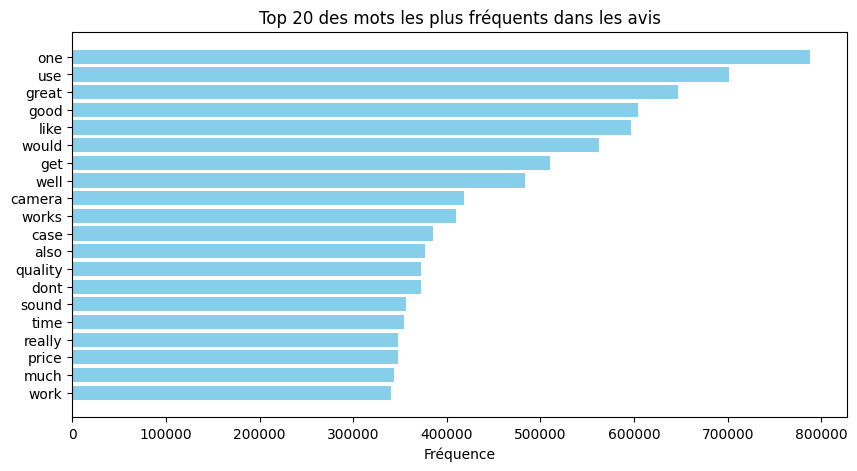

In [21]:

# Récupérer tous les mots des textes nettoyés
tous_les_mots = " ".join(df["review_clean"]).split()

# Compter la fréquence des mots
freq = Counter(tous_les_mots)

# Top 20
top_mots = freq.most_common(20)
mots, counts = zip(*top_mots)

# Affichage
plt.figure(figsize=(10, 5))
plt.barh(mots, counts, color="skyblue")
plt.gca().invert_yaxis()
plt.title("Top 20 des mots les plus fréquents dans les avis")
plt.xlabel("Fréquence")
plt.show()


In [22]:
!pip install bertopic umap-learn hdbscan sentence-transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB ? eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 184.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 748.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 548.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 425.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 1.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
from bertopic import BERTopic

# Créer et ajuster le modèle
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(df["review_clean"])


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [1]:
topic_model.get_topic_info().head(10)  # Affiche les 10 thèmes les plus fréquents


NameError: name 'topic_model' is not defined